In [46]:
# 차원 축소: 속도 증가와 시각화 용이
# 주요 기법 1) 투영(Projection)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [47]:
# 3D 화살표를 그리기 위한 클래스
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [48]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0, 2] * x1 + R[1, 2] * x2) / (1 - R[2, 2])

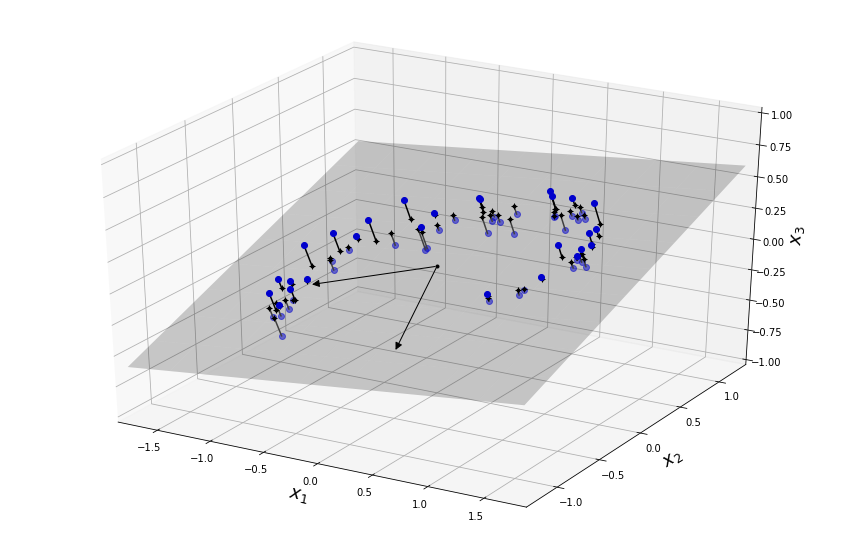

In [49]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 9.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if X[i, 2] > X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050")
    
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=7)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=7)
ax.set_zlabel("$x_3$", fontsize=18, labelpad=4)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

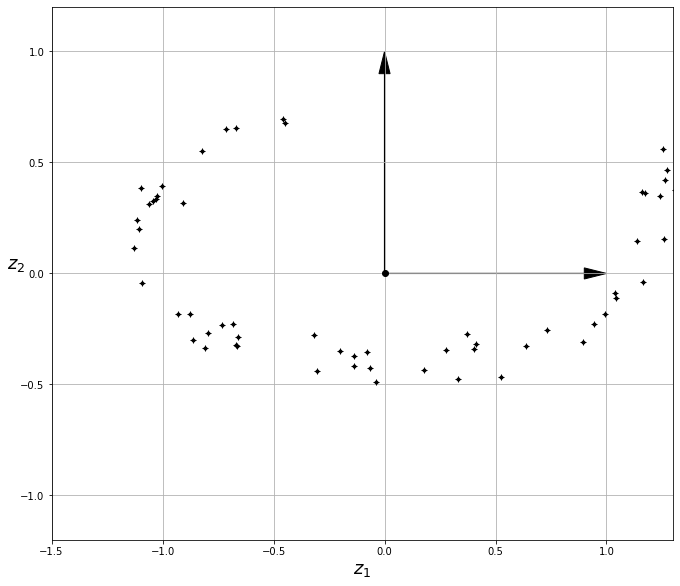

In [50]:
fig = plt.figure(figsize=(15, 9.8))
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:, 0], X2D[:, 1], "k+")
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)

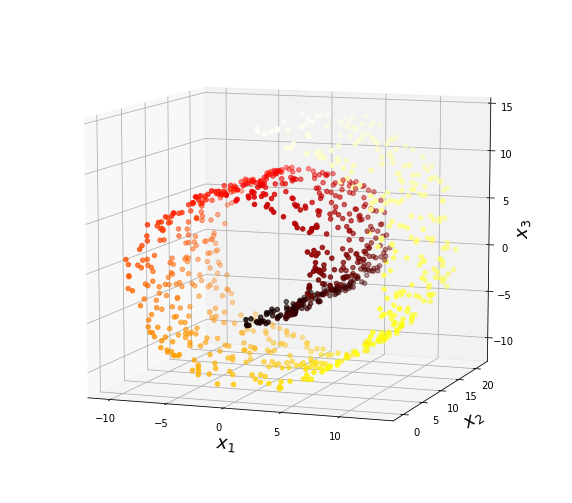

In [51]:
# 주요 기법 2) 매니폴드 학습
# 고차원 공간에서 휘어지거나 뒤틀린 2D 모양
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18, labelpad=7)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=7)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

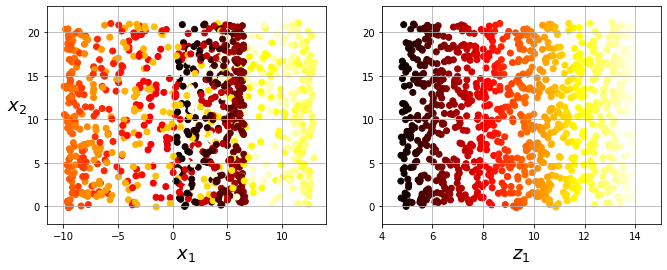

In [52]:
# 평면에 투영시켜 뭉개진 것(왼쪽), 스위스 롤을 펼친 것(오른쪽)
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0, labelpad=10)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

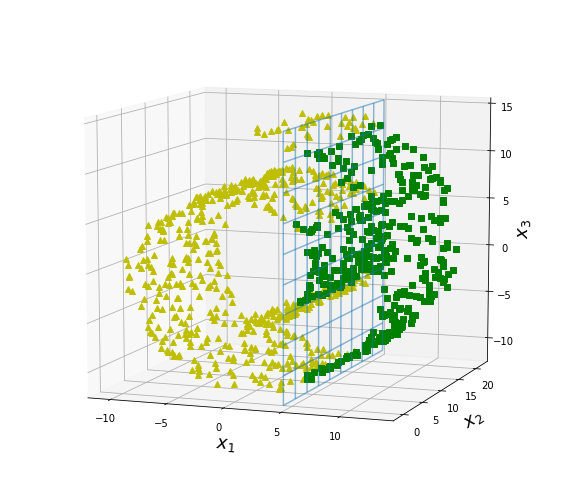

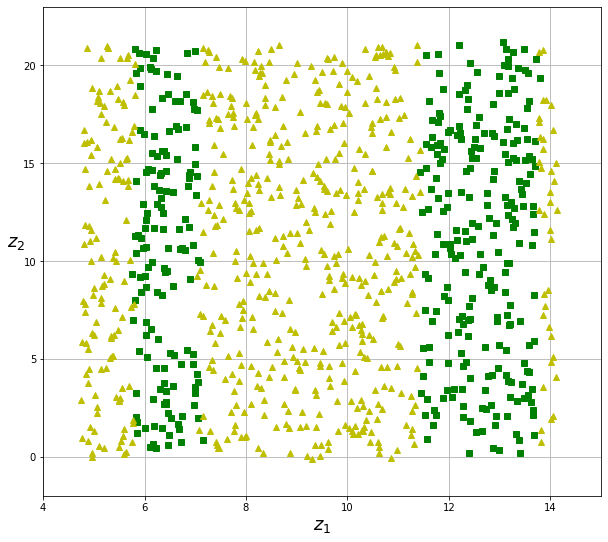

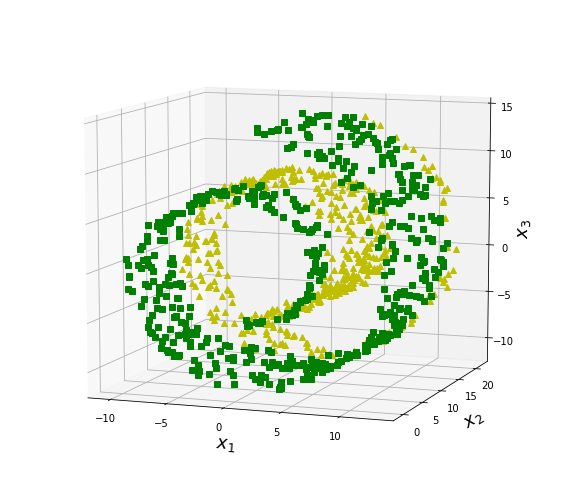

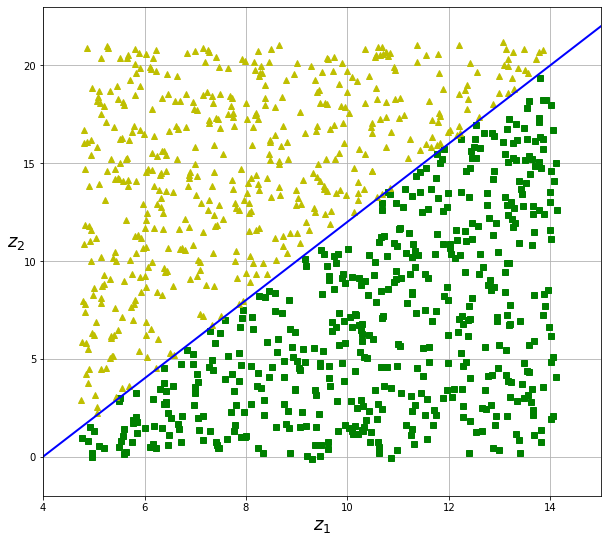

In [53]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(10, 9))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=7)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=7)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(10, 9))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0, labelpad=7)
plt.grid(True)

plt.show()

fig = plt.figure(figsize=(10, 9))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18, labelpad=7)
ax.set_ylabel("$x_2$", fontsize=18, labelpad=7)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(10, 9))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0, labelpad=7)
plt.grid(True)

plt.show()

In [54]:
# 모델을 훈련시키기 전에 훈련 세트의 차원을 축소시키면 훈련 속도는 빨라지지만 항상 더 좋은 솔루션은 아니다.

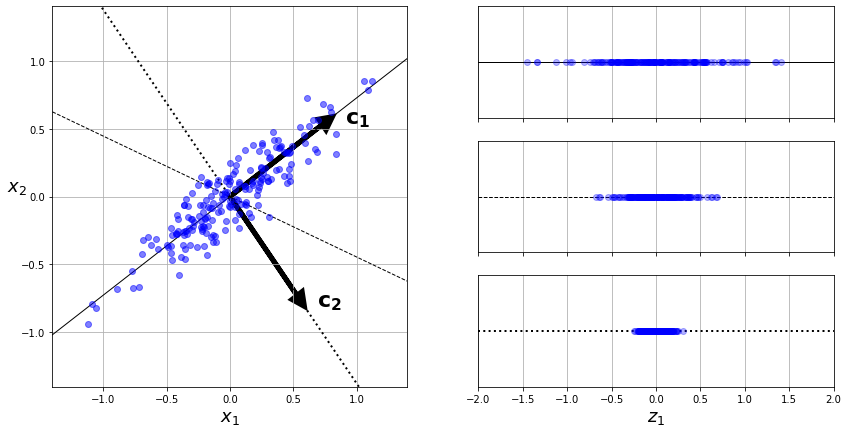

In [57]:
# PCA

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(14, 7))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

In [58]:
# 저차원의 초평면에 훈련세트를 투영하기 전에 올바른 초평면을 선택해야 한다.
# 오른쪽 그래프에서 위에서부터 분산이 최대로 보존하는 축
# => 분산이 최대로 보존되는 축을 선택해야 정보가 가장 적게 손실된다.

In [64]:
# 훈련 세트에서 주성분 찾기
# => 특잇값 분해(SVD, singular Value Decomposition)
# => numpy의 svd

np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

# SVD 분해를 사용한 PCA
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered) # Vt는 행렬 V의 전치인 Vr
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [65]:
# PCA를 직접 구현하거나 다른 라이브러리를 사용할 경우엔 데이터를 원점에 맞추어야 함

In [66]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [67]:
# d차원으로 투영하기
# 주성분을 모두 추출했다면 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소시킬 수 있음
# 이 초평면은 분산을 가능한 한 최대로 보존하는 투영임을 보장
W2 = Vt.T[:, :2] # 첫 d개의 주성분을 담은 행렬 W2(V의 첫 d열로 구성된)
X2D = X_centered.dot(W2)


X2D_using_svd = X2D

In [71]:
# 샘플 수는 60개이므로 행렬 X는 (60, 3)이고, 두 개의 주성분이 담긴 W2의 크기는 (3, 2)
# 투영된 X2D 행렬의 크기는 (60, 2)
print(X.shape)
print(W2.shape)
print(X2D.shape)

(60, 3)
(3, 2)
(60, 2)


In [72]:
# 사이킷런을 사용한 PCA
# PCA 모델을 사용해 데이터셋의 차원을 2로 줄이는 코드
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [73]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [75]:
# SVD로 구한 투영된 행렬 X2D_using_svd와 사이킷런의 pca로 구한 투영된 행렬 X2D
# 두 축이 반대로 뒤집힌 것 외에는 동일한 투영 결과
print(np.allclose(X2D, X2D_using_svd))
print(np.allclose(X2D, -X2D_using_svd))

False
True


In [78]:
# 주성분 확인
# 첫 번째 주성분
pca.components_.T[:, 0]

array([-0.93636116, -0.29854881, -0.18465208])

In [82]:
# 설명된 분산의 비율
# explained_variance_ratio_ 변수에 저장된 주성분의 설명된 분산의 비율은 공분산 행렬의 고윳값
# 이 값은 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타냄
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [84]:
# 첫 번째 차원이 84.2%의 분산을 포함, 두 번째가 14.6%의 분산을 포함
1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

In [85]:
# 2D로 투영했기 때문에 분산의 1.1%를 손실

In [89]:
# 적절한 차원 수 선택하기
# 축소할 차원 수를 임의로 정하기보다 충분한 분산(95%)이 될 때까지 더해야 할 차원 수를 선택하는 것이 선호
# 차원을 축소하지 않고 PCA를 계산하고 훈련 세트의 분산을 95%로 유지하는 데 필요한 최소의 차원 수 계산

from six.moves import urllib
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)

In [92]:
X = mnist['data']
y = mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [93]:
d

154

In [95]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [96]:
pca.n_components_

154

In [97]:
np.sum(pca.explained_variance_ratio_)

0.9504300487870422

In [122]:
# 훈련 세트의 분산을 95%로로 유지!
# MNIST의 각 샘플은 원래 784개 특성이 아니라 150개 정도의 특성만 가지고 있게 됨
# 대부분의 분산은 유지되었지만 데이터셋은 원본 크기의 20% 미만이 됨
# => 상당한 압축률과 분류 알고리즘의 속도를 크게 높일 수 있음
# 반대로 투영의 변환을 반대로 해서 784개의 차원으로 되돌릴 수 있음(손실된 정보는 복구 x)

# 원본 데이터와 재구성된 데이터(압축 후 원복한 것) 사이의 평균 제곱 거리 = 재구성 오차

# MNIST 데이터셋을 154차원으로 압축하고 inverse_transform()메소드로 784차원으로 복원
pca2 = PCA(n_components = 154)
X_reduced = pca2.fit_transform(X_train)
X_recovered = pca2.inverse_transform(X_reduced)

In [123]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Restore after compression')

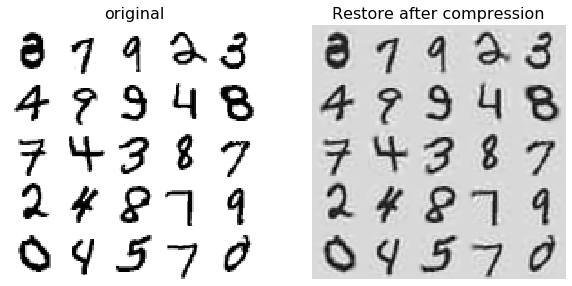

In [124]:
plt.figure(figsize=(10, 8))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Restore after compression", fontsize=16)

In [125]:
X_reduced_pca = X_reduced

In [126]:
# 이미지 품질이 조금 손실되어 보이지만 숫자 모양은 거의 온전한 상태

In [137]:
# 1) 점진적 PCA
# PCA 구현의 문제는 SVD 알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다.
# 이를 위한 점진적 PCA 알고리즘 개발
# 훈련 세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입

# MNIST 데이터셋을 100개의 미니배치로 나누고, 차원을 154개로 줄이기
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch) # 전체 훈련 세트를 사용하는 fit()이 아닌 미니배치마다 partial_fit()

X_reduced = inc_pca.transform(X_train)

In [138]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

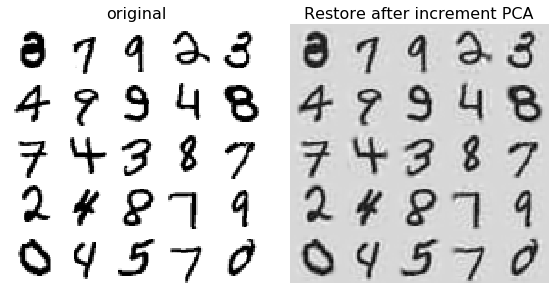

In [139]:
plt.figure(figsize=(8, 6))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.title("Restore after increment PCA", fontsize=16)
plt.tight_layout()

In [140]:
X_reduced_inc_pca = X_reduced

In [141]:
# 일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과 비교
# 평균 확인
np.allclose(pca.mean_, inc_pca.mean_)

True

In [142]:
np.allclose(X_reduced_pca, X_reduced)

False

In [143]:
# 점진적 PCA는 훌륭한 근사치를 제공하지만 완벽하지는 않다

In [144]:
# 2) 랜덤 PCA
# 확률적인 알고리즘으로, 첫 d개의 주성분에 대한 근삿값을 빠르게 찾음
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [145]:
X_recovered_rnd_pca = rnd_pca.inverse_transform(X_reduced)

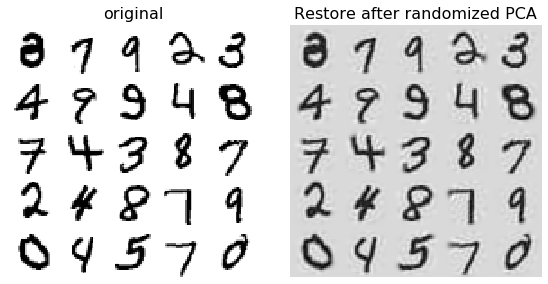

In [146]:
plt.figure(figsize=(8, 6))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered_rnd_pca[::2100])
plt.title("Restore after randomized PCA", fontsize=16)
plt.tight_layout()

In [147]:
# 시간 복잡도 비교(점진적 PCA vs 랜덤 PCA)
import time

for n_components in (2, 10, 154):
    print("n_components = ", n_components)
    
    # origin
    regular_pca = PCA(n_components=n_components)
    
    # 점진적 PCA
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    
    # 랜점 PCA
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")
    
    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        
        print('   {}: {:.1f} seconds'.format(pca.__class__.__name__, t2 - t1))

n_components =  2
   PCA: 1.9 seconds
   IncrementalPCA: 19.0 seconds
   PCA: 2.2 seconds
n_components =  10
   PCA: 2.4 seconds
   IncrementalPCA: 19.4 seconds
   PCA: 2.3 seconds
n_components =  154
   PCA: 7.3 seconds
   IncrementalPCA: 29.9 seconds
   PCA: 7.2 seconds


In [148]:
# 확실히 랜덤 PCA가 알고리즘 계산이 더 빠름

Text(0.5, 1.0, "PCA and random PCA's time complexity")

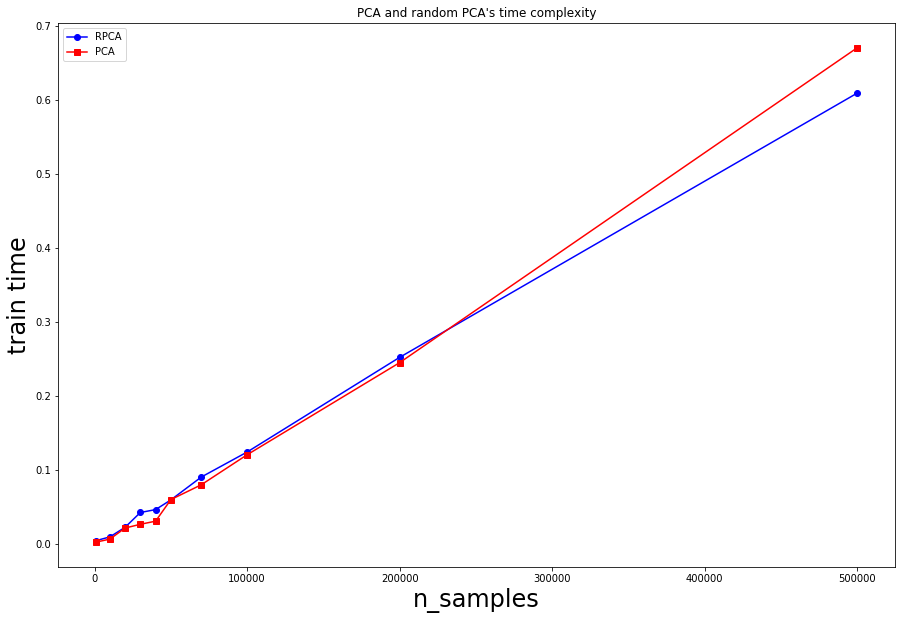

In [154]:
# 이번에는 데이터셋의 크기를 바꾸어 가며 일반 PCA와 랜덤 PCA 비교(점진적 PCA는 너무 느림)
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]

for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    
    pca = PCA(n_components = 2, svd_solver="randomized", random_state=42)
    
    t1 = time.time()
    
    pca.fit(X)

    t2 = time.time()
    times_rpca.append(t2 - t1)
    
    pca = PCA(n_components = 2)

    t1 = time.time()
    
    pca.fit(X)

    t2 = time.time()
    times_pca.append(t2 - t1)
    
plt.figure(figsize=(15, 10))
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples", fontsize=24)
plt.ylabel("train time", fontsize=24)
plt.legend(loc="upper left")
plt.title("PCA and random PCA's time complexity")

Text(0.5, 1.0, "PCA and random PCA's time complexity")

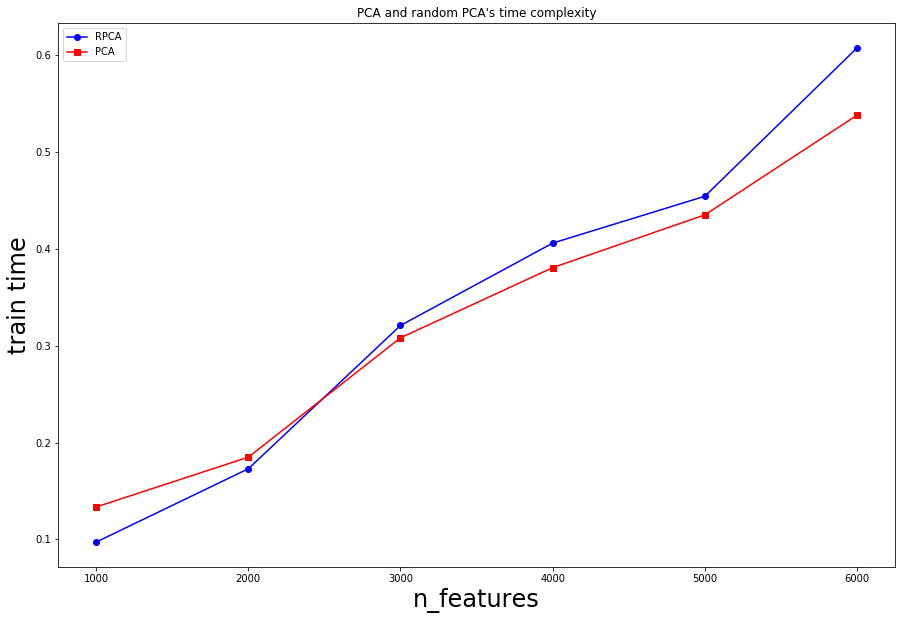

In [155]:
# 이번에는 특성의 개수를 바꾸어가며 2000개의 데이터셋에서 일반 PCA와 랜덤 PCA 비교
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]

for n_features in sizes:
    X = np.random.randn(2000, n_features)
    
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")

    t1 = time.time()
    
    pca.fit(X)
    
    t2 = time.time()
    times_rpca.append(t2 - t1)
    
    pca = PCA(n_components = 2)
    t1 = time.time()
    
    pca.fit(X)
    
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.figure(figsize=(15, 10))
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features", fontsize=24)
plt.ylabel("train time", fontsize=24)
plt.legend(loc="upper left")
plt.title("PCA and random PCA's time complexity")

In [156]:
# 커널 PCA

# 높은 고차원 공간(특성 공간)으로 암묵적으로 매핑하여 SVM의 비선형 분류와 회귀를 가능하게 한 커널 트릭
# 고차원 특성 공간에서의 선형 결정 경계는 원본 공간에서는 복잡한 비선형 결정 경계
# => 같은 기법으로 복잡한 비선형 투영으로의 차원 축소를 가능하게 할 수 있음(커널 PCA)

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [157]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

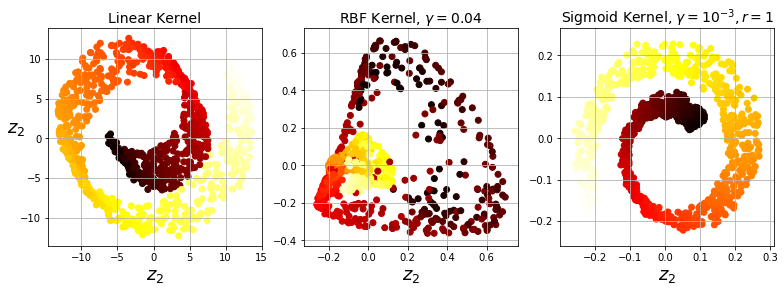

In [160]:
# 선형 커널
lin_pca = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
# RBF 커널
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
# 시그모이드 커널
sig_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(13, 4))

for subplot, pca, title in ((131, lin_pca, 'Linear Kernel'), 
                            (132, rbf_pca, 'RBF Kernel, $\gamma=0.04$'),
                            (133, sig_pca, 'Sigmoid Kernel, $\gamma=10^{-3}, r=1$')):
    X_reduced = pca.fit_transform(X)
    
    if subplot == 132:
        X_reduced_rbf = X_reduced
        
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_2$", fontsize=18)
    
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
        
    plt.grid(True)
    
plt.show()

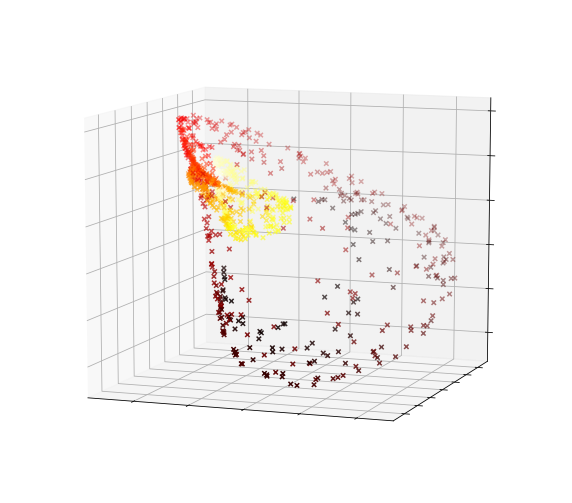

In [161]:
# RBF Kernel로 축소시킨 스위스 롤의 3D 원본으로 복구

plt.figure(figsize=(10, 9))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

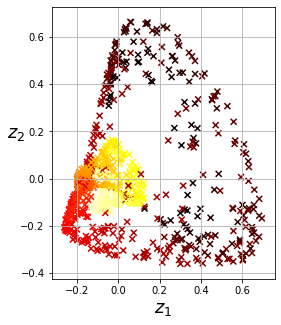

In [170]:
# 다시 한 번 2차원으로 축소
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(4, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

In [172]:
# 커널 선택과 하이퍼파라미터 튜닝
# 좋은 커널과 하이퍼파라미터를 측정하기 위한 전처리 단계
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver='liblinear'))
])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                                 

In [173]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [179]:
# 다시 최적의 하이퍼파라미터 모델 생성
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)

X_reduced = rbf_pca.fit_transform(X)

# 재구성 원상
# 축소된 공간에 있는 샘플에 대해 선형 PCA를 역전시키면 재구성된 데이터 포인트는 원본 공간이 아닌 특성 공간에 있음
# 이 특성 공간은 무한 차원이기 때문에 재구성된 포인트를 계산할 수 없고, 재구성에 따른 실제 에러를 계산할 수 없음
# => 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있음 => 재구성 원상(pre-image)

# 재구성 방법
# 투영된 샘플을 훈련 세트로, 원본 샘플을 타깃으로 하는 지도 학습 회귀 모델 사용
# fit_inverse_transform = True로 지정

# 재구성 원상
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [180]:
from sklearn.metrics import mean_squared_error

# 재구성 원상 오차: 원본 공간의 데이터 포인트와 특성 공간의 데이터 포인트 간의 거리 차이
mean_squared_error(X, X_preimage)

32.786308795766125

In [181]:
# 재구성 원상 오차를 최소화하는 커널과 하이퍼파라미터를 찾기 위해 다시 그리드 탐색으로 복귀

In [182]:
# LLE(Locally Linear Embedding, 지역 선형 임베딩)
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [183]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

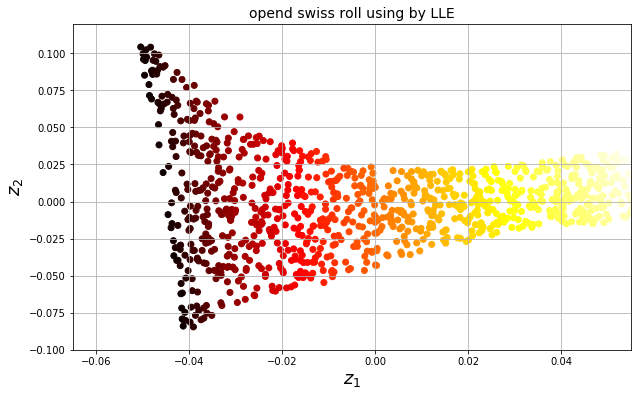

In [187]:
plt.figure(figsize=(10, 6))
plt.title("opend swiss roll using by LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)

plt.show()

In [188]:
# MDS, Isomap, t-SNE

from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

In [189]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [190]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [191]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
X_reduced_lda = lda.transform(X)

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(3, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [232]:
X_reduced_lda.shape

(1000, 1)

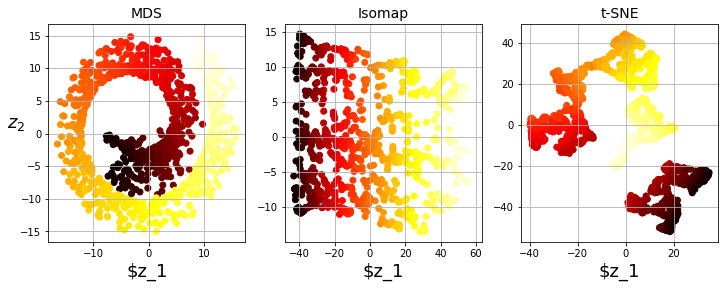

In [238]:
indexs = [i for i in range(1, 4)]
subplots = [131, 132, 133]
titles = ["MDS", "Isomap", "t-SNE"]

fig = plt.figure(figsize=(12, 4))

for i, subplot, title, X_reduced in zip(indexs,
                                        subplots,
                                        titles,
                                        (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):

    fig.add_subplot(1, 3, i)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1", fontsize=18)
    
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
        
    plt.grid(True)
    
plt.show()